In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import networkx as nx

In [2]:
df=pd.read_csv("income_data.csv")

In [3]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [4]:
df.shape

(32561, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<ipython-input-7-c378d5c3b91b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'Correlation Matrix')

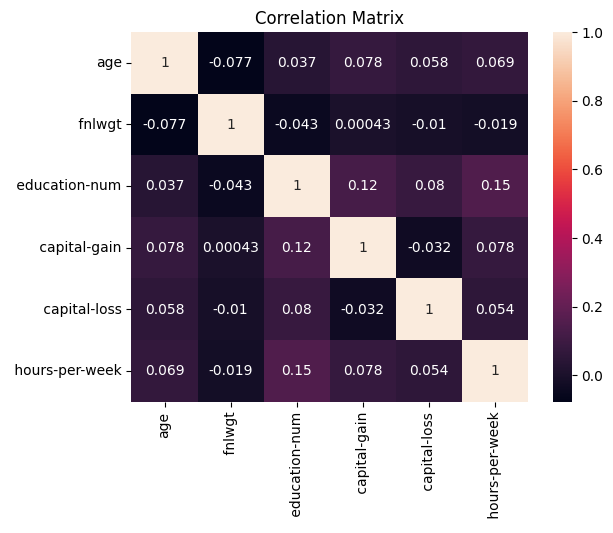

In [7]:
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Density Distribution of Age')

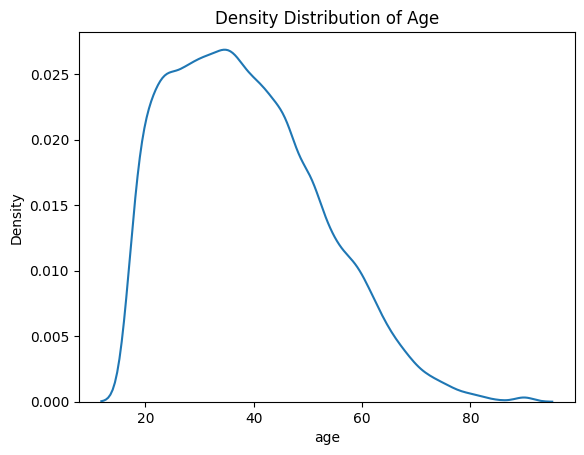

In [8]:
sns.kdeplot(x="age",data=df)
plt.title("Density Distribution of Age")

Text(0.5, 1.0, 'Age Distribution by Income')

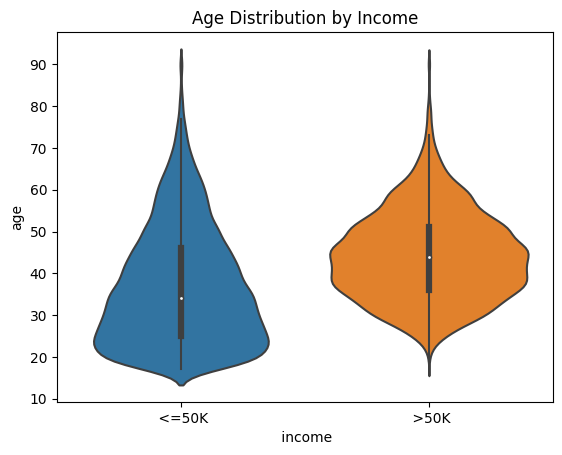

In [9]:
sns.violinplot(x=' income', y='age', data=df)
plt.title('Age Distribution by Income')

Text(0.5, 1.0, 'Education Number Distribution by Income')

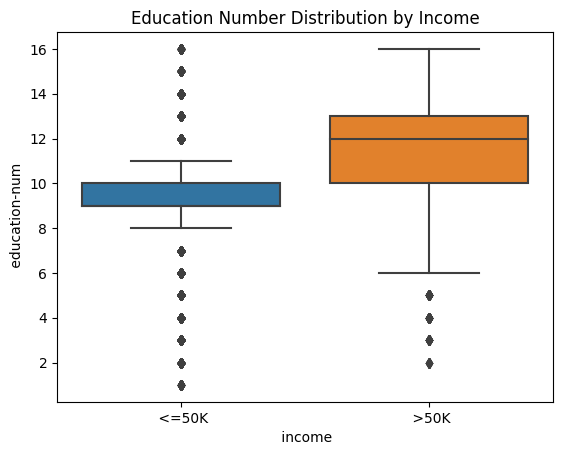

In [10]:
sns.boxplot(x=' income', y=' education-num', data=df)
plt.title('Education Number Distribution by Income')

Text(0.5, 1.0, 'Hours per Week by Occupation and Income')

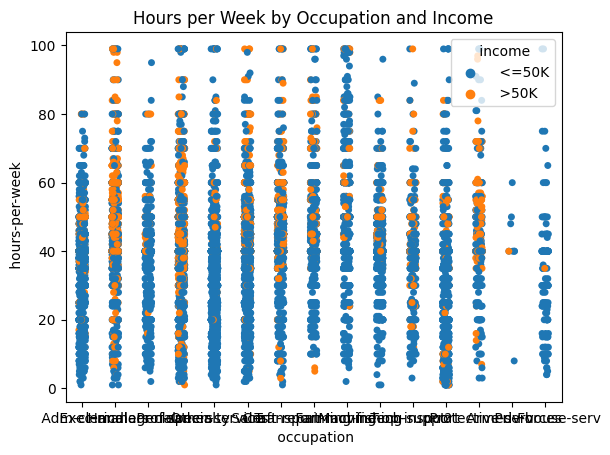

In [11]:
sns.stripplot(x=' occupation', y=' hours-per-week', hue=' income', data=df)
plt.title('Hours per Week by Occupation and Income')

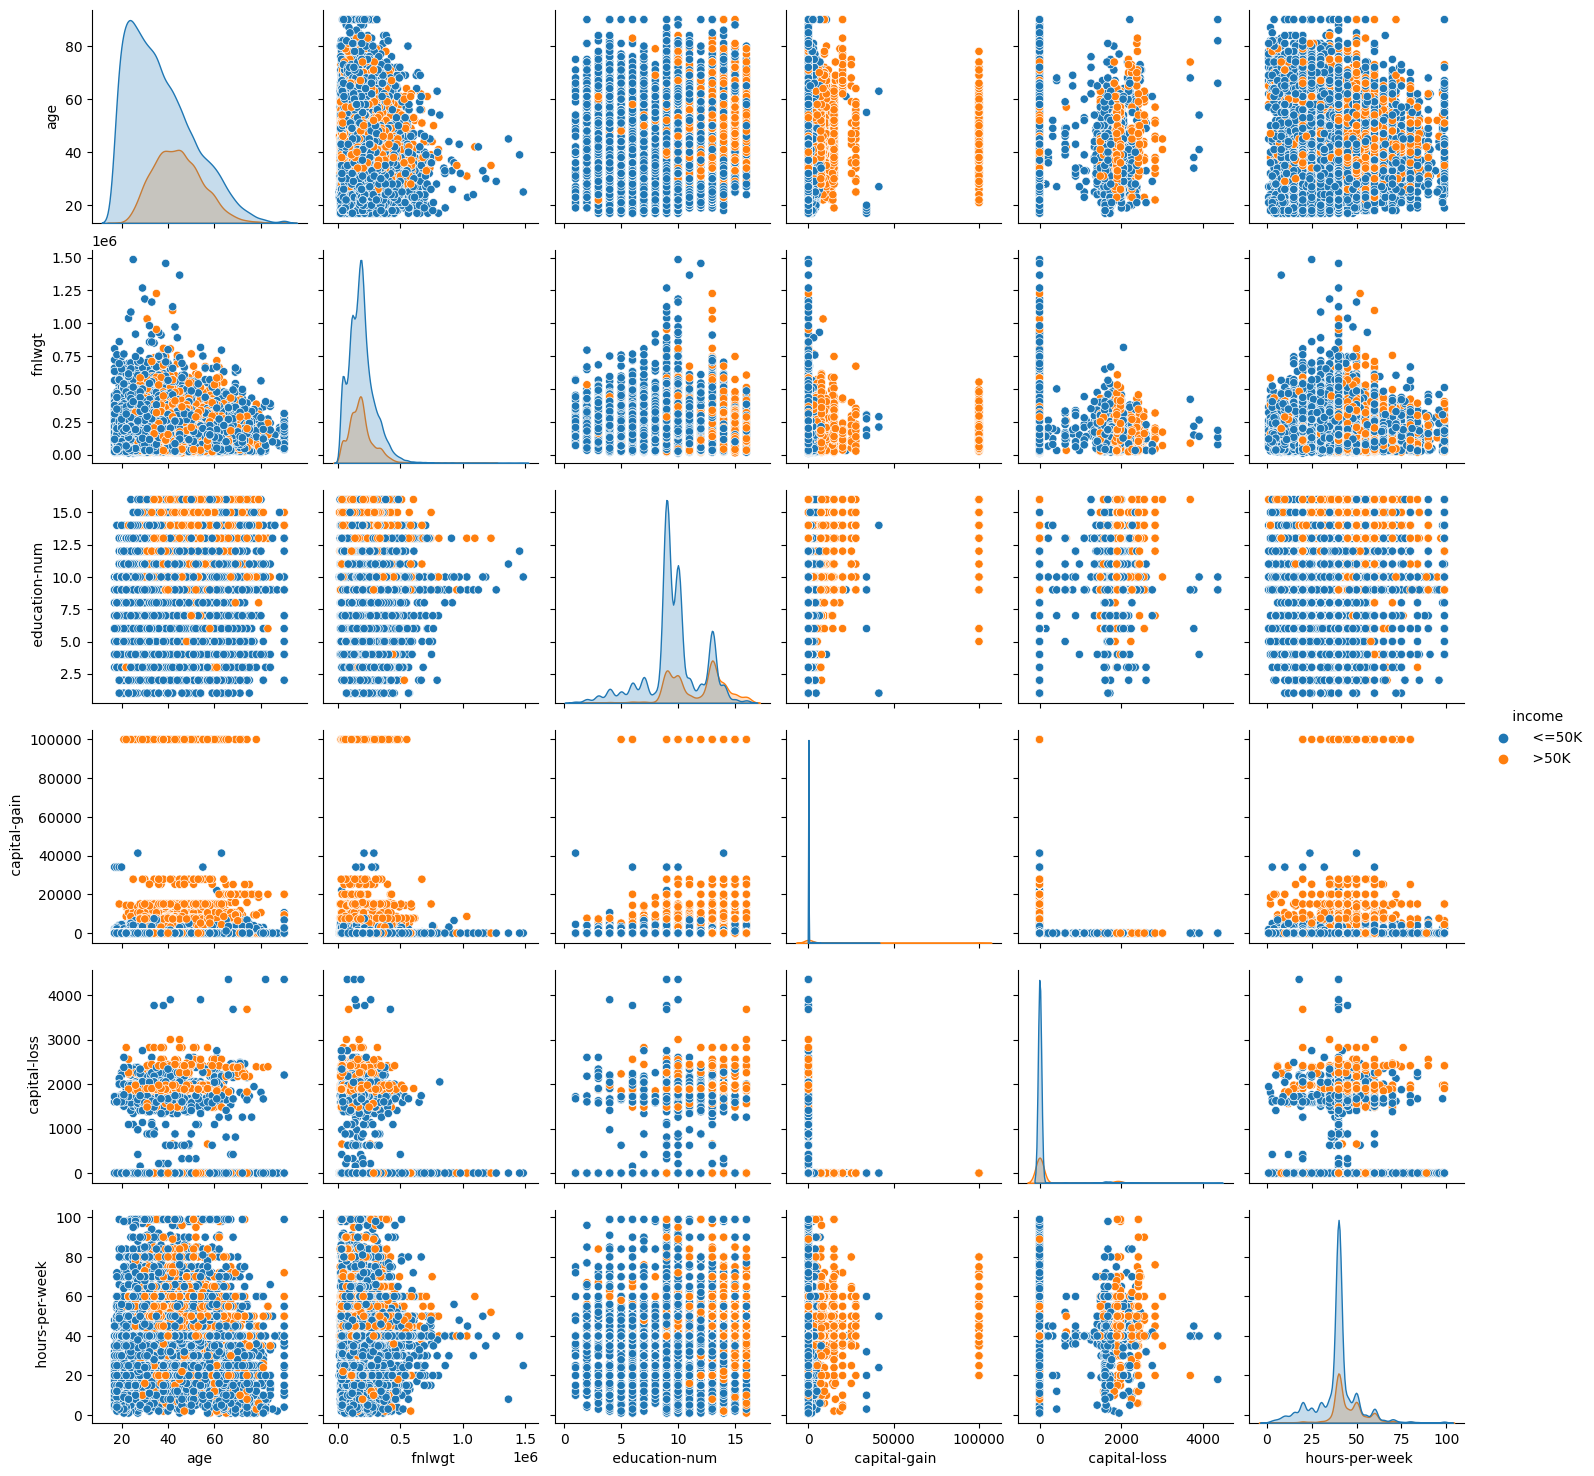

In [12]:
sns.pairplot(df, hue=' income', diag_kind='kde')

<ipython-input-13-3ce53cb6016b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Network')

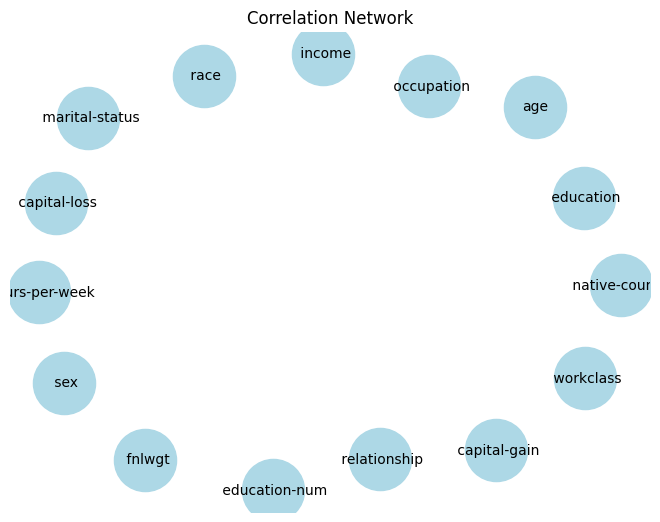

In [13]:
G = nx.Graph()
for feature in df.columns:
    G.add_node(feature)

corr_matrix = df.corr()
for i, feature1 in enumerate(corr_matrix.columns):
    for j, feature2 in enumerate(corr_matrix.columns):
        if i < j:
            correlation = corr_matrix.loc[feature1, feature2]
            if abs(correlation) > 0.5:
                G.add_edge(feature1, feature2, weight=correlation)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=10, node_size=2000, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)})
plt.title("Correlation Network")


In [14]:
df=df.dropna()

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
encoder=LabelEncoder()

In [17]:
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [18]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [19]:
df[" workclass"]=encoder.fit_transform(df[" workclass"])
df[" education"]=encoder.fit_transform(df[" education"])
df[" marital-status"]=encoder.fit_transform(df[" marital-status"])
df[" occupation"]=encoder.fit_transform(df[" occupation"])
df[" relationship"]=encoder.fit_transform(df[" relationship"])
df[" race"]=encoder.fit_transform(df[" race"])
df[" sex"]=encoder.fit_transform(df[" sex"])
df[" native-country"]=encoder.fit_transform(df[" native-country"])
df[" income"]=encoder.fit_transform(df[" income"])

In [20]:
x=df.drop(labels=" income",axis=1)
y=df[" income"]

In [21]:
x=StandardScaler().fit_transform(x)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.74      0.62      0.68      1566

    accuracy                           0.86      6508
   macro avg       0.81      0.78      0.79      6508
weighted avg       0.85      0.86      0.85      6508

